In [1]:
from collections import OrderedDict
import copy
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize as spopt
import platereaderdataloader as prdl

%matplotlib inline

In [28]:
filename = 'NS001 delta CAT max OD dilutions.xlsx'

plate_layout = ['null' + str(i) for i in range(1,6)] + ['blank' + str(i) for i in range(1,4)] + \
               [str(j) + ',' + str(i) for j in range(1,6) for i in range(8,0,-1)]

OD_dilution_data = prdl.import_platereader(filename, plate_layout)

In [29]:
OD_dilution_data.keys()

dict_keys(['times', 'well_ODs', 'layout'])

In [30]:
OD_dilution_data['times']

array([ 0.        ,  0.03444444,  0.06888889,  0.10333333,  0.13777778])

In [34]:
np.mean(OD_dilution_data['well_ODs']['1,8'])

0.70312399999999997

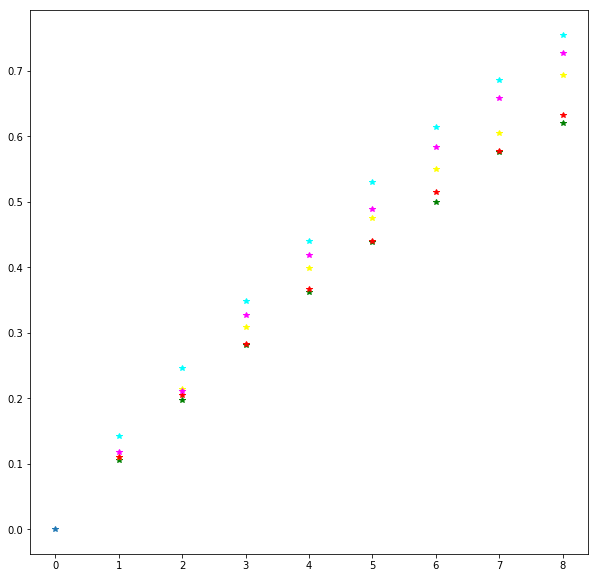

In [39]:
plt.figure(figsize=(10,10))
colors = ['blue', 'green', 'yellow', 'red', 'magenta', 'cyan', 'black']
plt.plot(0, 0,'*')
for i in range(1,9):
    for j in range(1,6):
        plt.plot(i, np.mean(OD_dilution_data['well_ODs'][str(j)+','+str(i)]) -
                 np.mean(OD_dilution_data['well_ODs']['blank1']),'*', color=colors[j])

In [44]:
dilution_series = np.zeros((5,9))
for i in range(1,9):
    for j in range(5):
        dilution_series[j,i] = np.mean(OD_dilution_data['well_ODs'][str(j+1)+','+str(i)]) - \
                 np.mean(OD_dilution_data['well_ODs']['blank1'])

In [45]:
dilution_series

array([[ 0.      ,  0.104878,  0.197344,  0.280602,  0.361788,  0.438118,
         0.499986,  0.5766  ,  0.620954],
       [ 0.      ,  0.109794,  0.213736,  0.309306,  0.39853 ,  0.47479 ,
         0.55061 ,  0.6054  ,  0.693966],
       [ 0.      ,  0.110668,  0.20538 ,  0.282788,  0.366674,  0.440634,
         0.514348,  0.577656,  0.63296 ],
       [ 0.      ,  0.118314,  0.210938,  0.326704,  0.419426,  0.489454,
         0.583142,  0.657874,  0.726862],
       [ 0.      ,  0.142832,  0.245396,  0.348906,  0.440194,  0.529906,
         0.61397 ,  0.686744,  0.754962]])

In [59]:
poly1 = np.polyfit(np.arange(9), dilution_series[0], 2, full=True)

In [60]:
poly1

(array([-0.0031121 ,  0.10259318,  0.00242047]),
 array([ 0.00014109]),
 3,
 array([ 1.64131706,  0.54128982,  0.11438373]),
 1.9984014443252818e-15)

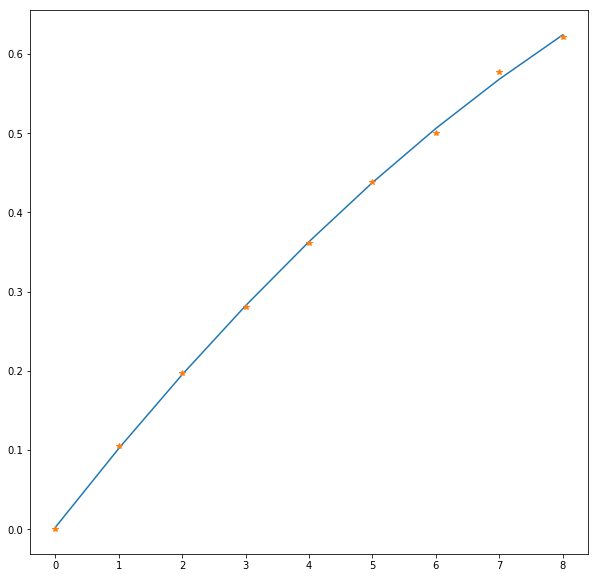

In [50]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(9), .00242047 + .10259318*np.arange(9) + -.0031121*np.arange(9)**2, '-')
plt.plot(np.arange(9), dilution_series[0], '*')

In [54]:
poly5 = np.polyfit(np.arange(9), dilution_series[4], 2, full=True)

In [55]:
poly5

(array([-0.00397472,  0.12462665,  0.00968823]),
 array([ 0.00029613]),
 3,
 array([ 1.64131706,  0.54128982,  0.11438373]),
 1.9984014443252818e-15)

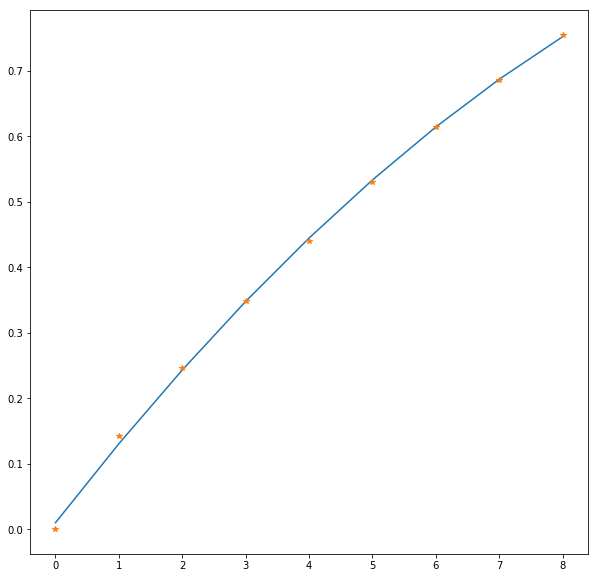

In [56]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(9), .00968823 + .12462665*np.arange(9) + -.00397472*np.arange(9)**2, '-')
plt.plot(np.arange(9), dilution_series[4], '*')

In [62]:
np.roots(poly1[0])

array([  3.29894587e+01,  -2.35760595e-02])

In [63]:
np.roots(poly5[0])

array([ 31.43234807,  -0.07754624])

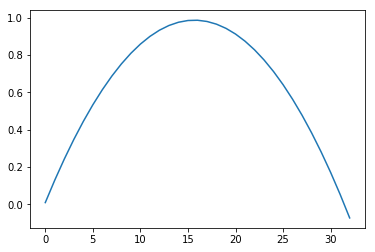

In [64]:
plt.plot(np.arange(33), .00968823 + .12462665*np.arange(33) + -.00397472*np.arange(33)**2, '-')